# DBSCAN clustering ALGO

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
def PointsInCircum(r, n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30, 30),
             math.sin(2*math.pi/n*x)*r+np.random.normal(-30, 30)) for x in range(1, n+1)]

In [8]:
df = pd.DataFrame(PointsInCircum(500, 1000))
df = pd.concat([df, pd.DataFrame(PointsInCircum(300, 700))])
df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 300))])

# Replace `np.random.randit` with `np.random.randint` if generating random integers
df = pd.concat([df, pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])])


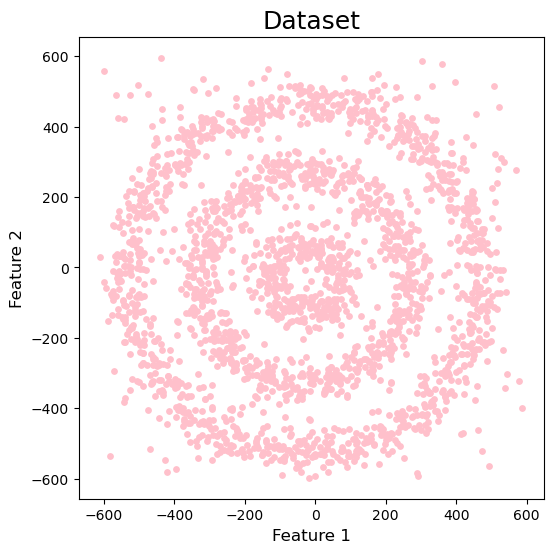

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(df[0], df[1], s=15, color='pink')
plt.title('Dataset', fontsize=18)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.show()

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=42)
km.fit(df[[0, 1]])

C:\Users\Ramsaheb Prasad\.conda\envs\Itachi\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ramsaheb Prasad\.conda\envs\Itachi\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Ramsaheb Prasad\.conda\envs\Itachi\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Ramsaheb Prasad\.conda\envs\Itachi\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Ramsaheb Prasad\.conda\envs\Itachi\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pi

KMeans(n_clusters=4, random_state=42)

In [11]:
df['KMeans_labels'] = km.labels_

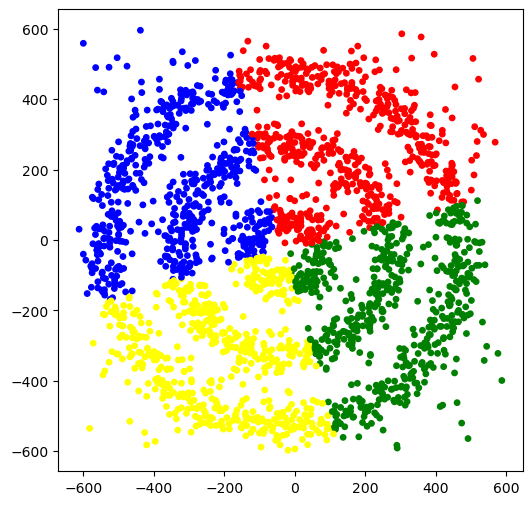

In [17]:
import matplotlib
colors = ['green', 'red', 'blue', 'yellow']
plt.figure(figsize=(6, 6))
plt.scatter(df[0], df[1], c=df['KMeans_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Create the Agglomerative Clustering model without affinity
ac = AgglomerativeClustering(n_clusters=4, linkage='ward')  # 'ward' uses Euclidean distance by default

# Fit the model to the first two columns of the DataFrame
ac.fit(df.iloc[:, [0, 1]])


AgglomerativeClustering(n_clusters=4)

In [24]:
df['HR_labels'] = ac.labels_


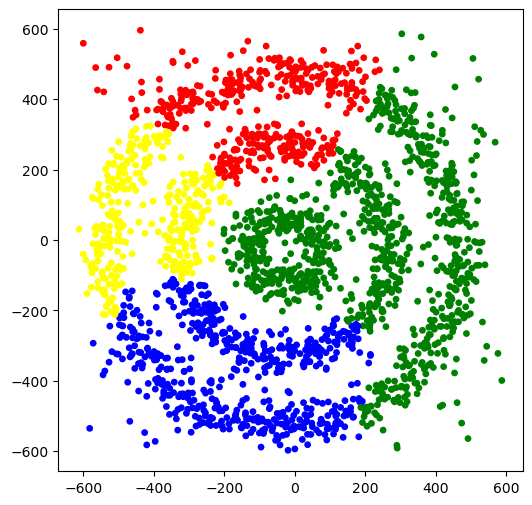

In [25]:
import matplotlib
colors = ['green', 'red', 'blue', 'yellow']
plt.figure(figsize=(6, 6))
plt.scatter(df[0], df[1], c=df['HR_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.show()

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=30, min_samples=6)
db.fit(df[[0, 1]])

DBSCAN(eps=30, min_samples=6)

In [29]:
df['DB_labels'] = db.labels_
df['DB_labels'].value_counts()

DB_labels
 5    739
 0    580
 6    306
-1    222
 4    191
 2    157
 3    100
 1      5
Name: count, dtype: int64

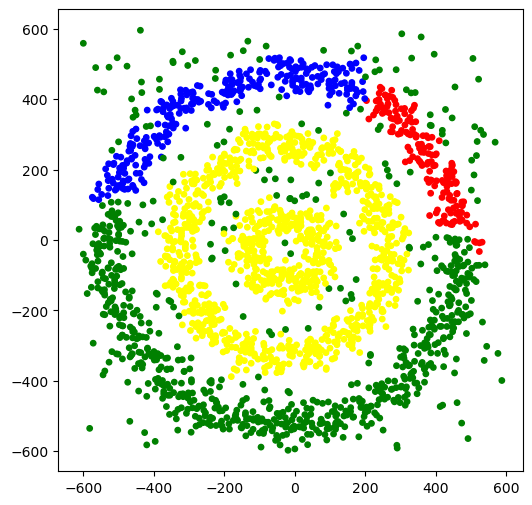

In [30]:
import matplotlib
colors = ['green', 'red', 'blue', 'yellow']
plt.figure(figsize=(6, 6))
plt.scatter(df[0], df[1], c=df['DB_labels'],
            cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.show()